In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data/Admission_Predict_V2.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,LOR
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92,NaN
1,2,324.0,107.0,4,4.0,4.5,8.87,1,0.76,NaN
2,3,316.0,104.0,3,3.0,3.5,8.00,1,0.72,NaN
3,4,322.0,110.0,3,3.5,2.5,8.67,1,0.80,NaN
4,5,314.0,103.0,2,2.0,3.0,8.21,0,0.65,NaN


In [4]:
df.info()
#GRE : Signifie Graduate Record Examination
#TOEFL : Signifie Test of English as a Foreign Language
#SOP : Signifie Statement of Purpose
    #utilisé par les comités d’admission pour évaluer les objectifs académiques
#LOR : Signifie Letter of Recommendation
    #utilisée pour juger du sérieux, du potentiel et des qualités personnelles du candidat
#CGPA : Signifie Cumulative Grade Point Average
    #utilisé pour évaluer la performance académique globale
#Research : Signifie Expérience de recherche


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         550 non-null    int64  
 1   GRE Score          550 non-null    float64
 2   TOEFL Score        513 non-null    float64
 3   University Rating  550 non-null    int64  
 4   SOP                513 non-null    float64
 5   LOR                550 non-null    float64
 6   CGPA               550 non-null    float64
 7   Research           550 non-null    int64  
 8   Chance of Admit    550 non-null    float64
 9   LOR                0 non-null      float64
dtypes: float64(7), int64(3)
memory usage: 43.1 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,LOR
count,550.000000,550.000000,513.000000,550.000000,513.000000,550.000000,550.000000,550.000000,550.000000,0.0
mean,250.896364,316.335651,107.204041,3.125455,3.376218,3.484545,8.591772,0.572727,0.721655,NaN
std,146.927197,12.674963,6.434952,1.135889,0.995978,0.925375,0.616908,0.495133,0.142310,NaN
min,1.000000,277.754368,91.916154,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000,NaN
25%,121.250000,308.000000,102.725335,2.000000,2.500000,3.000000,8.131200,0.000000,0.630000,NaN
50%,251.500000,316.000000,107.000000,3.000000,3.500000,3.500000,8.589128,1.000000,0.720000,NaN
75%,378.750000,325.000000,112.000000,4.000000,4.000000,4.000000,9.060000,1.000000,0.830000,NaN
max,500.000000,353.144823,125.588646,5.000000,5.000000,5.000000,10.240747,1.000000,0.970000,NaN


In [6]:
df_clean = df.drop(columns=[df.columns[9] , df.columns[0]])

In [105]:
df_clean.isna().sum()

GRE Score             0
TOEFL Score          37
University Rating     0
SOP                  37
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [106]:
df_clean = df_clean.dropna()

In [12]:
df_clean.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

## Analyse univariée avec matplotlib

<Axes: >

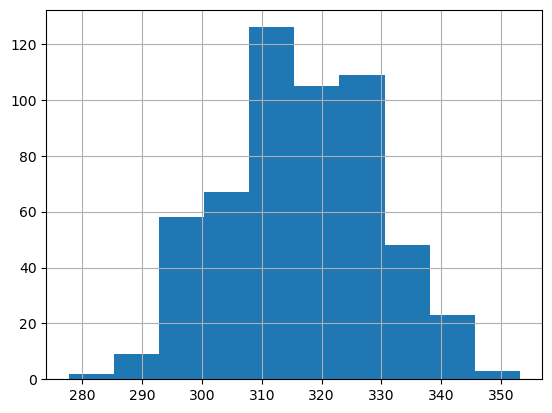

In [18]:
df_clean["GRE Score"].hist()

La valeur de GRE Score se concentre sur l'intervale de 300 à 335

<Axes: >

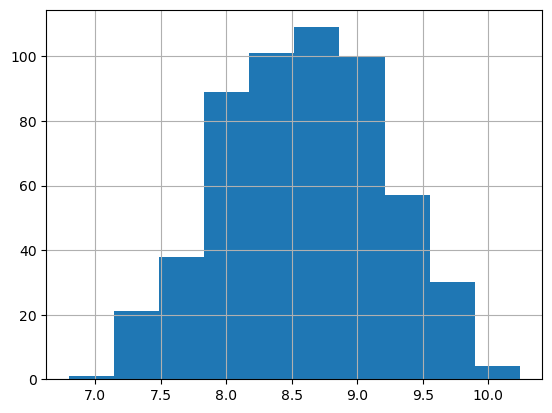

In [11]:
df_clean["CGPA"].hist()

On voit que la valeur du CGPA se concentre sur l'inntervalle de 8 à 9.5

<Axes: >

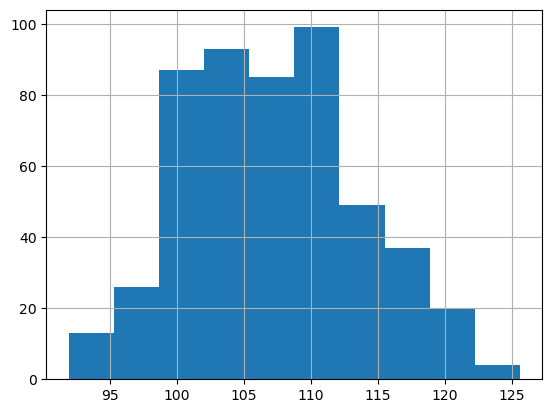

In [13]:
df_clean["TOEFL Score"].hist()

La valeur du TOEFL se concentre sur l'intervale de 100 à 120

<Axes: >

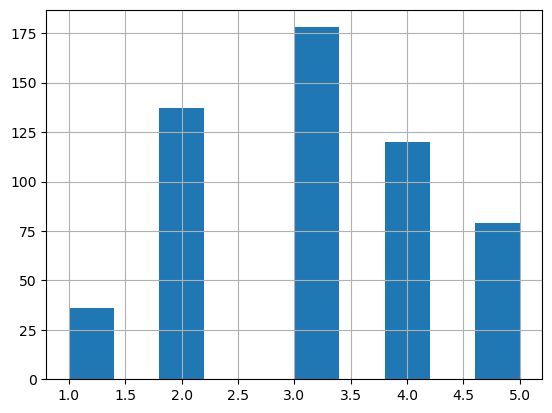

In [14]:
df_clean["University Rating"].hist()

la valeur se concentre sur l'intervale de 3 à 3.5

<Axes: >

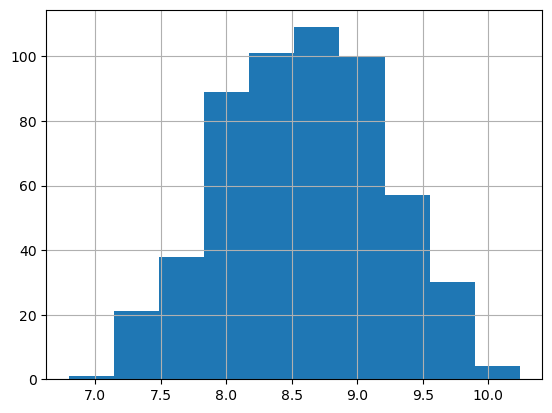

In [17]:
df_clean["CGPA"].hist()

<Axes: ylabel='count'>

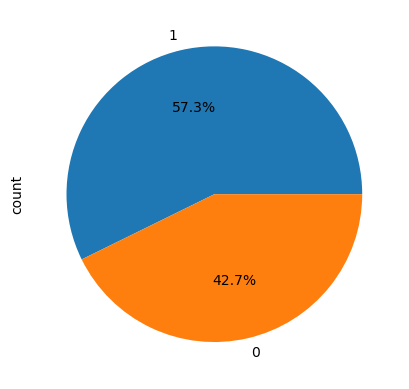

In [27]:
df_clean["Research"].value_counts().plot(kind='pie', autopct='%1.1f%%')

Les 57.3% des édutiants font de recherche et 42.7% non pas.

<Axes: >

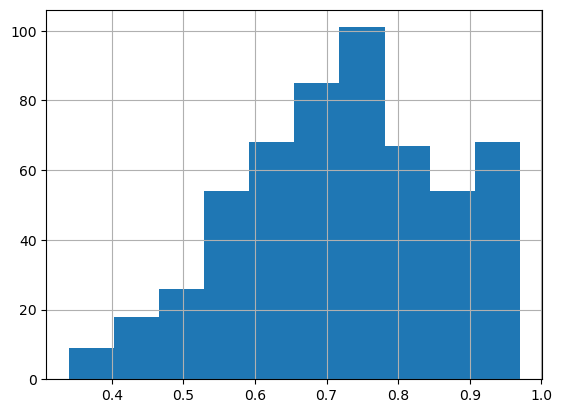

In [30]:
df_clean["Chance of Admit "].hist()

La valeur de chance of admit se concentre sur l'intervale de 0.6 à 0.8

## Analyse bivariée avec matplotlib

c:\Users\ADMIN\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='GRE Score', ylabel='Chance of Admit '>

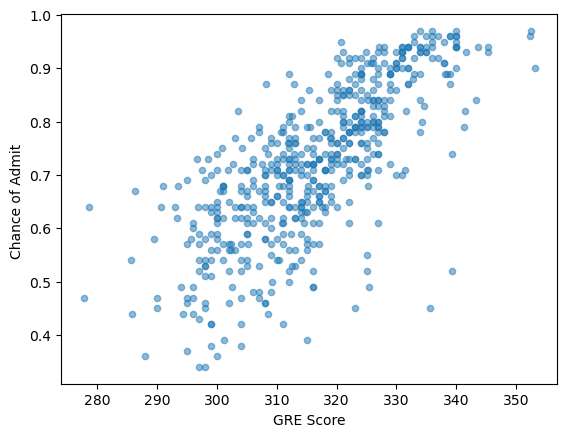

In [31]:
df_clean.plot.scatter(x='GRE Score', y='Chance of Admit ', colormap='viridis', alpha=0.5)

In [36]:
df_clean["GRE Score"].corr(df_clean["Chance of Admit "])

0.7455321158753446

On voit une relation positive. C'est dire plus le GRE Score augmente et plus la Chance of Admit est elevée.
Avec des correlations fortes

c:\Users\ADMIN\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='CGPA', ylabel='Chance of Admit '>

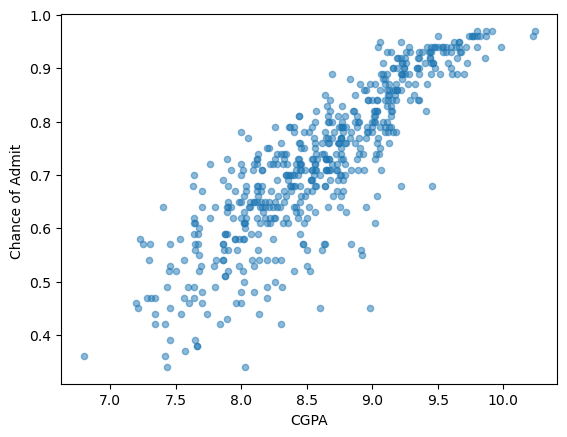

In [32]:
df_clean.plot.scatter(x='CGPA', y='Chance of Admit ', colormap='viridis', alpha=0.5)

In [37]:
df_clean["CGPA"].corr(df_clean["Chance of Admit "])

0.8601109954039861

On voit une relation positive. C'est dire plus le CGPA augmente et plus la Chance of Admit est elevée.
Avec des correlations fortes

c:\Users\ADMIN\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit '>

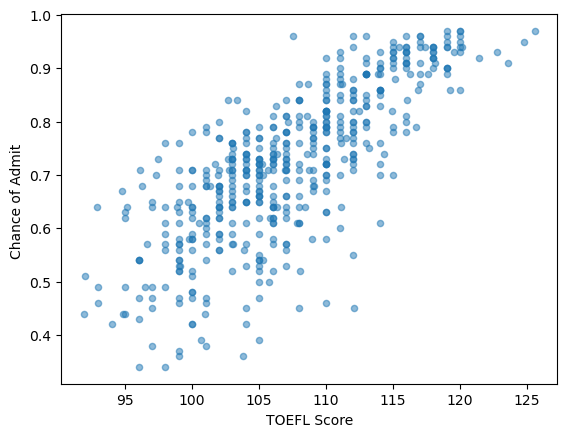

In [34]:
df_clean.plot.scatter(x='TOEFL Score', y='Chance of Admit ', colormap='viridis', alpha=0.5)

In [38]:
df_clean["TOEFL Score"].corr(df_clean["Chance of Admit "])

0.7723039462022873

On voit une relation positive. C'est dire plus le TOEFL Score augmente et plus la Chance of Admit est elevée.
Avec des correlations fortes

<Axes: title={'center': 'Chance of Admit '}, xlabel='Research'>

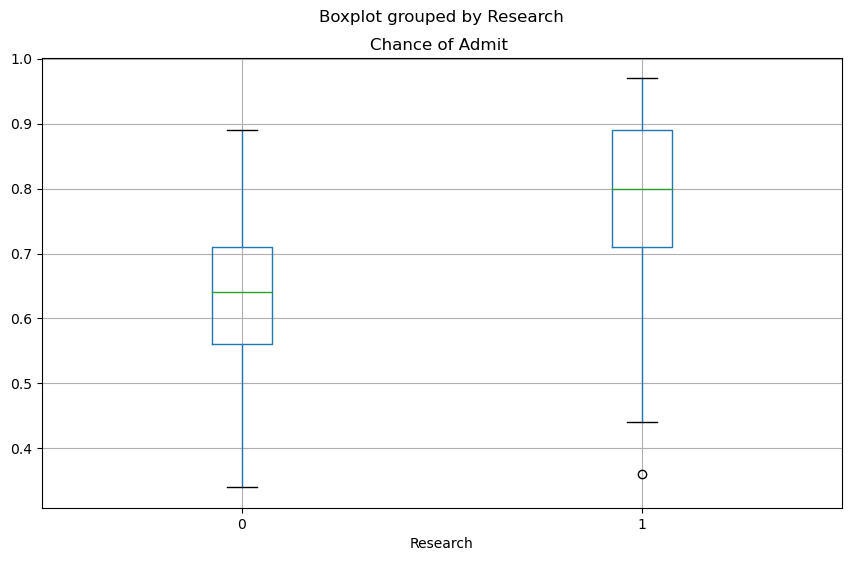

In [35]:
df_clean.boxplot(column='Chance of Admit ', by='Research', figsize=(10, 6))

In [40]:
df_clean["Research"].corr(df_clean["Chance of Admit "])

0.5477442585652942

On voit que ce qui ont fait de recherche a beaucoup de chance d'etre admit que ce qui n'ont pas fait.Avec des correlations assez elevé

In [107]:
df_clean['Admitted'] = (df_clean['Chance of Admit '] >= 0.69).astype(int)

In [108]:
corr_matrix = df_clean.corr(numeric_only=True)
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
GRE Score,1.000000,0.751509,0.611207,0.591861,0.522259,0.762239,0.506428,0.753756,0.609998
TOEFL Score,0.751509,1.000000,0.648528,0.636343,0.542998,0.783509,0.440778,0.776408,0.609004
University Rating,0.611207,0.648528,1.000000,0.737628,0.623166,0.694516,0.426363,0.693715,0.553432
SOP,0.591861,0.636343,0.737628,1.000000,0.675466,0.714103,0.416346,0.690473,0.543975
LOR,0.522259,0.542998,0.623166,0.675466,1.000000,0.629481,0.387537,0.658282,0.527771
CGPA,0.762239,0.783509,0.694516,0.714103,0.629481,1.000000,0.481586,0.861997,0.680779
Research,0.506428,0.440778,0.426363,0.416346,0.387537,0.481586,1.000000,0.545430,0.454772
Chance of Admit,0.753756,0.776408,0.693715,0.690473,0.658282,0.861997,0.545430,1.000000,0.807034
Admitted,0.609998,0.609004,0.553432,0.543975,0.527771,0.680779,0.454772,0.807034,1.000000


<Axes: >

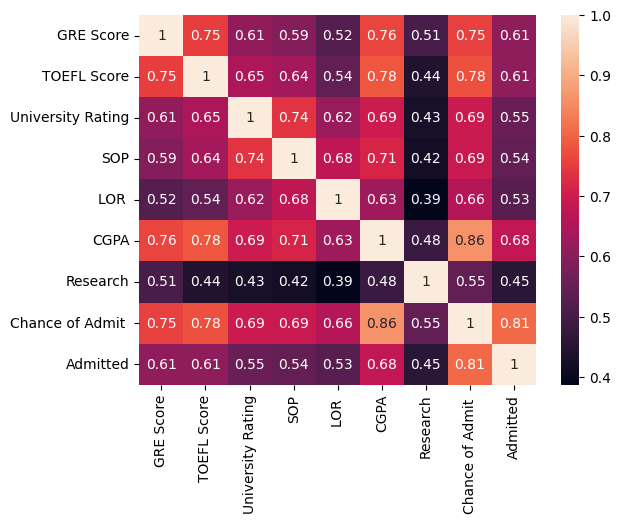

In [109]:
#Pour voir la correlation parmis tous les variables

sns.heatmap(corr_matrix , annot=True)

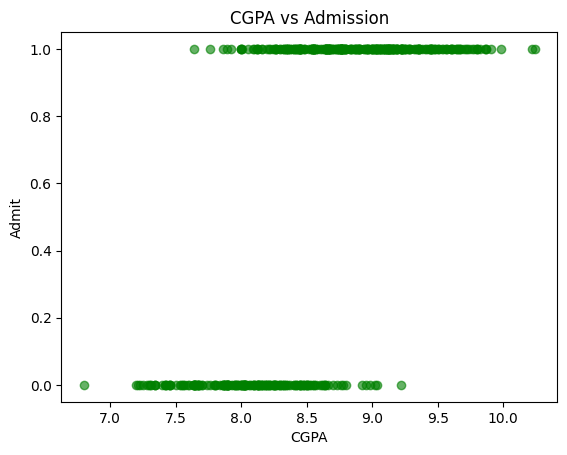

In [110]:
# Visualiser la corrélation entre la moyenne générale (CGPA) et la chance d’admission.
plt.scatter(df_clean['CGPA'], df_clean['Admitted'], alpha=0.6, color='green')
plt.title("CGPA vs Admission")
plt.xlabel("CGPA")
plt.ylabel("Admit")
plt.show()

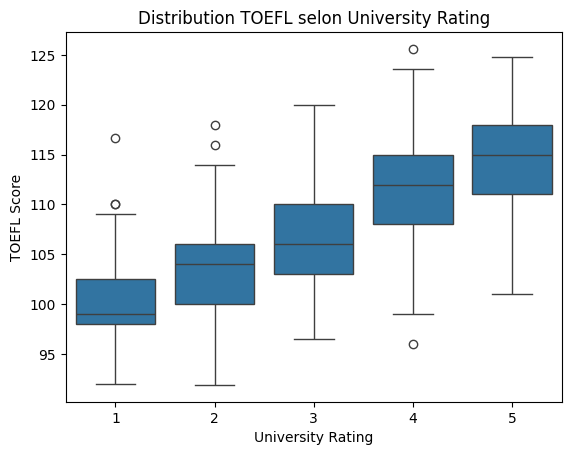

In [111]:

sns.boxplot(x='University Rating', y='TOEFL Score', data=df_clean)
plt.title("Distribution TOEFL selon University Rating")
plt.show()

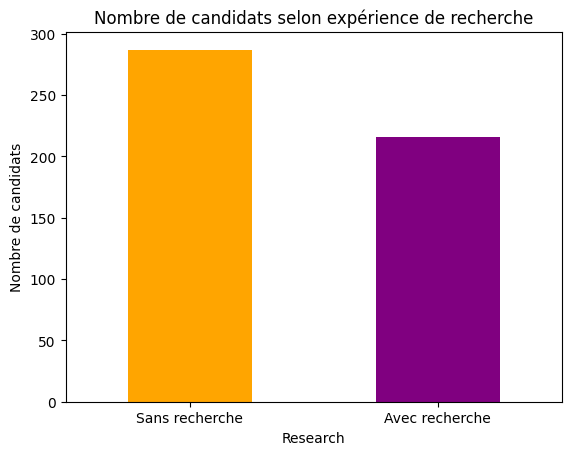

In [112]:
#Research correspond probablement si l'étudiant a une experience de recherche ou non
#1 : le candidat a participé à des projets de recherche ou a une expérience de recherche
#2 : le candidat n’a pas d’expérience de recherche
research_counts = df_clean['Research'].value_counts()

research_counts.plot(kind='bar', color=['orange', 'purple'])
plt.xticks([0,1], ['Sans recherche', 'Avec recherche'], rotation=0)
plt.title("Nombre de candidats selon expérience de recherche")
plt.ylabel("Nombre de candidats")
plt.show()

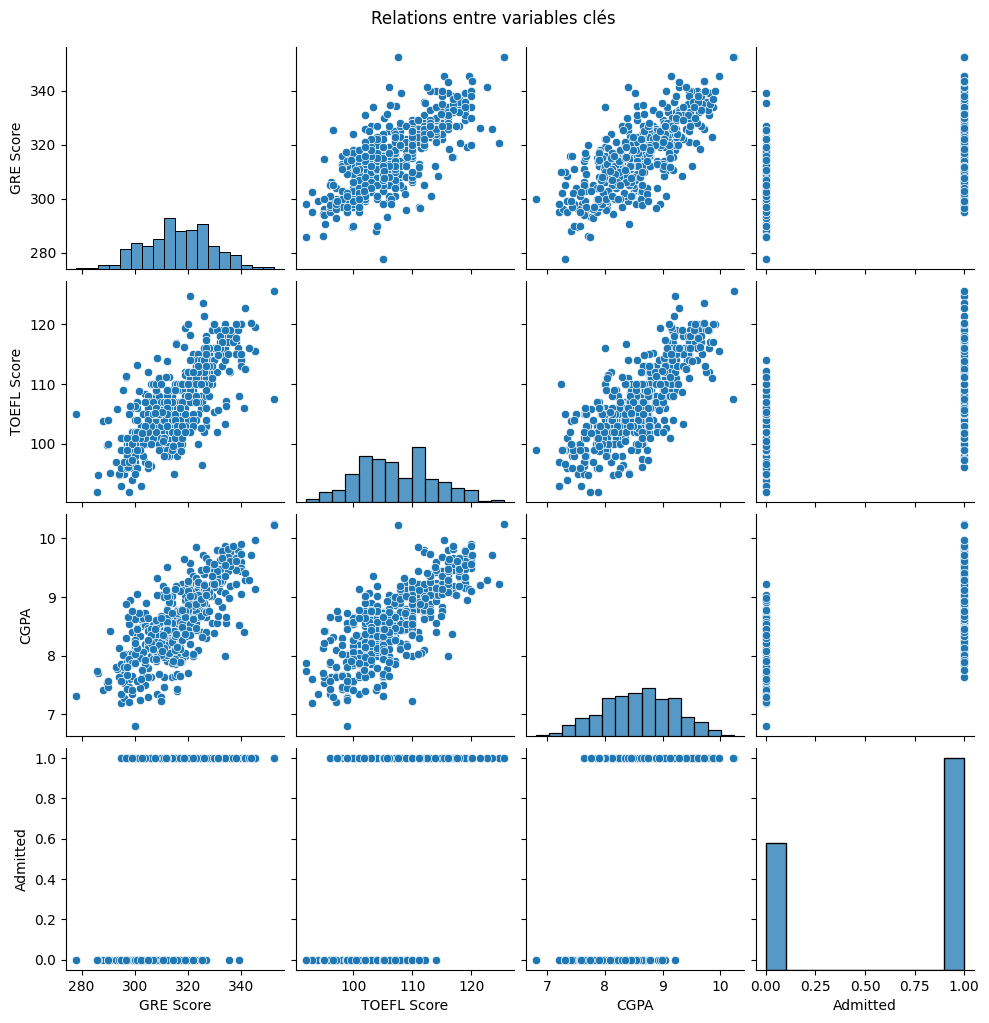

In [113]:
sns.pairplot(df_clean[['GRE Score', 'TOEFL Score', 'CGPA', 'Admitted']].dropna())
plt.suptitle("Relations entre variables clés", y=1.02)
plt.show()

In [114]:
#Les colonnes qu'on utilisera pour entrainer le modèle
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
X = df_clean[features]
y = df_clean['Admitted']

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

# Séparation de l'entraînement et du test ici on utilise que 20% de notre donné
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline avec scaler et modèle
final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Entraînement
final_model.fit(X_train, y_train)

# Prédiction
y_pred = final_model.predict(X_test)

In [116]:
# ici on compare y_test à y_pred donc accuracy = y_pred/y_test
print("Accuracy :", accuracy_score(y_test, y_pred))
# Affiche un tableau croisé qui indique le nombre de fois ou chaque classe a été bien ou mal prédite.
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
# Affiche plusieurs metriques de classsification pour chaque classe
print("Classification Report :\n", classification_report(y_test, y_pred))



Accuracy : 0.8712871287128713
Confusion Matrix :
 [[26  8]
 [ 5 62]]
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.76      0.80        34
           1       0.89      0.93      0.91        67

    accuracy                           0.87       101
   macro avg       0.86      0.85      0.85       101
weighted avg       0.87      0.87      0.87       101



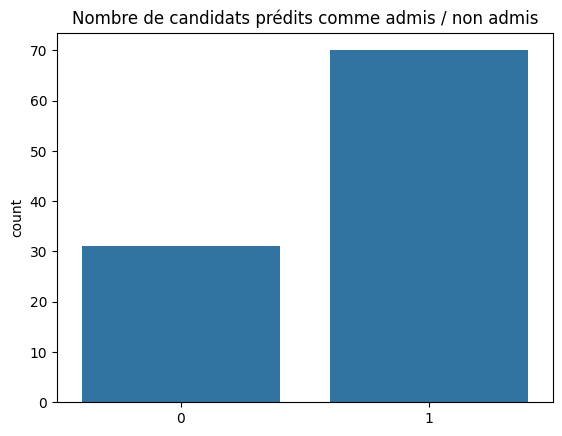

In [117]:
# Comparaison réelle vs prédite
sns.countplot(x=y_pred)
plt.title("Nombre de candidats prédits comme admis / non admis")
plt.show()



In [118]:
import joblib    
joblib.dump(final_model , 'data/final_model')

['data/final_model']

In [119]:
def test_model_input(model):
    print("=== Prédiction d'admission à l'université ===")
    print("Tape 'aucun' si tu n'as jamais passé un test ou fourni un document.\n")

    # GRE Score
    while True:
        gre_input = input("GRE Score (260-340 ou 'aucun') : ").strip().lower()
        if gre_input == 'aucun':
            gre = 300  # valeur par défaut neutre
            print("GRE non fourni. Valeur par défaut utilisée : 300")
            break
        try:
            gre = float(gre_input)
            if 260 <= gre <= 340:
                break
            else:
                print("Valeur hors plage.")
        except ValueError:
            print("Entrée invalide.")

    # TOEFL Score
    while True:
        toefl_input = input("TOEFL Score (0-120 ou 'aucun') : ").strip().lower()
        if toefl_input == 'aucun':
            toefl = 90  # valeur par défaut neutre
            print("TOEFL non fourni. Valeur par défaut utilisée : 90")
            break
        try:
            toefl = float(toefl_input)
            if 0 < toefl <= 120:
                break
            else:
                print("Valeur hors plage.")
        except ValueError:
            print("Entrée invalide.")

    # University Rating
    while True:
        ur_input = input("Note de l'université (1 à 5 ou 'aucun') : ").strip().lower()
        if ur_input == 'aucun':
            ur = 3  # neutre
            print("Note d'université non fournie. Valeur par défaut utilisée : 3")
            break
        try:
            ur = int(ur_input)
            if 1 <= ur <= 5:
                break
            else:
                print("Valeur hors plage.")
        except ValueError:
            print("Entrée invalide.")

    # SOP
    while True:
        sop_input = input("SOP (Lettre de motivation notée de 0.0 à 5.0 ou 'aucun') : ").strip().lower()
        if sop_input == 'aucun':
            sop = 3.0
            print("SOP non fourni. Valeur par défaut utilisée : 3.0")
            break
        try:
            sop = float(sop_input)
            if 0.0 <= sop <= 5.0:
                break
            else:
                print("Valeur hors plage.")
        except ValueError:
            print("Entrée invalide.")

    # LOR
    while True:
        lor_input = input("LOR (Lettre de recommandation notée de 0.0 à 5.0 ou 'aucun') : ").strip().lower()
        if lor_input == 'aucun':
            lor = 3.0
            print("LOR non fournie. Valeur par défaut utilisée : 3.0")
            break
        try:
            lor = float(lor_input)
            if 0.0 <= lor <= 5.0:
                break
            else:
                print("Valeur hors plage.")
        except ValueError:
            print("Entrée invalide.")

    # CGPA
    while True:
        cgpa_input = input("CGPA (Moyenne générale sur 10 ou 'aucun') : ").strip().lower()
        if cgpa_input == 'aucun':
            cgpa = 7.5
            print("CGPA non fourni. Valeur par défaut utilisée : 7.5")
            break
        try:
            cgpa = float(cgpa_input)
            if 0.0 <= cgpa <= 10.0:
                break
            else:
                print("Valeur hors plage.")
        except ValueError:
            print("Entrée invalide.")

    # Expérience de recherche
    while True:
        research_input = input("Expérience de recherche (oui / non) : ").strip().lower()
        if research_input in ['oui', 'non']:
            research = 1 if research_input == 'oui' else 0
            break
        print("Réponse invalide. Tape 'oui' ou 'non'.")

    # Assemblage des données
    new_data = pd.DataFrame([{
        'GRE Score': gre,
        'TOEFL Score': toefl,
        'University Rating': ur,
        'SOP': sop,
        'LOR ': lor,
        'CGPA': cgpa,
        'Research': research
    }])

    # Prédiction
    prediction = model.predict(new_data)[0]

    print("\nRésultat de la prédiction :")
    if prediction == 1:
        print("=> Candidat probablement admis.")
    else:
        print("=> Candidat probablement non admis.")

# Exemple d'exécution
import joblib
model_loaded = joblib.load('data/final_model')
test_model_input(model_loaded)


=== Prédiction d'admission à l'université ===
Tape 'aucun' si tu n'as jamais passé un test ou fourni un document.

GRE non fourni. Valeur par défaut utilisée : 300
SOP non fourni. Valeur par défaut utilisée : 3.0
LOR non fournie. Valeur par défaut utilisée : 3.0

Résultat de la prédiction :
=> Candidat probablement admis.
